Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [78]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Reshape

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir('/content/drive/MyDrive/')

['Colab Notebooks',
 'Skin cancer ISIC The International Skin Imaging Collaboration.zip',
 'dataSet']

In [ ]:

train_folder_path = f'/content/drive/MyDrive/dataSet/Train'
test_folder_path = f'/content/drive/MyDrive/dataSet/Test'

data_dir_train = pathlib.Path(train_folder_path)
data_dir_test = pathlib.Path(test_folder_path)

print("Contents of the train directory:")
for item in data_dir_train.iterdir():
    print(item)

print("\nContents of the test directory:")
for item in data_dir_test.iterdir():
    print(item)

Contents of the train directory:
/content/drive/MyDrive/dataSet/Train/melanoma
/content/drive/MyDrive/dataSet/Train/dermatofibroma
/content/drive/MyDrive/dataSet/Train/squamous cell carcinoma
/content/drive/MyDrive/dataSet/Train/pigmented benign keratosis
/content/drive/MyDrive/dataSet/Train/vascular lesion
/content/drive/MyDrive/dataSet/Train/nevus
/content/drive/MyDrive/dataSet/Train/basal cell carcinoma
/content/drive/MyDrive/dataSet/Train/actinic keratosis
/content/drive/MyDrive/dataSet/Train/seborrheic keratosis

Contents of the test directory:
/content/drive/MyDrive/dataSet/Test/nevus
/content/drive/MyDrive/dataSet/Test/squamous cell carcinoma
/content/drive/MyDrive/dataSet/Test/basal cell carcinoma
/content/drive/MyDrive/dataSet/Test/dermatofibroma
/content/drive/MyDrive/dataSet/Test/pigmented benign keratosis
/content/drive/MyDrive/dataSet/Test/seborrheic keratosis
/content/drive/MyDrive/dataSet/Test/actinic keratosis
/content/drive/MyDrive/dataSet/Test/vascular lesion
/content

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/**/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/**/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
#Importing training data set from the folder
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
#creating vallidation data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
#Understanding shape
for images, labels in train_ds.take(1):
    print(f"Images batch shape: {images.shape}")
    print(f"Labels batch shape: {labels.shape}")

Images batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


In [ ]:
# Normalize pixel values to be between 0 and 1
def normalize_image(image, label):
    image = image / 255.0
    return image, label

normalized_train_ds = train_ds.map(normalize_image)
normalized_val_ds = val_ds.map(normalize_image)


for images, labels in normalized_train_ds.take(1):
    print(f"Train Images batch shape: {images.shape}")
    print(f"Train Labels batch shape: {labels.shape}")

for images, labels in normalized_val_ds.take(1):
    print(f"Val Images batch shape: {images.shape}")
    print(f"Val Labels batch shape: {labels.shape}")

Train Images batch shape: (32, 180, 180, 3)
Train Labels batch shape: (32,)
Val Images batch shape: (32, 180, 180, 3)
Val Labels batch shape: (32,)


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(30, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

In [ ]:
# Iterate through the train dataset to retrieve labels
labels_list = []
image_list = []

for images, labels in normalized_train_ds:
    labels_list.append(labels.numpy())
    image_list.append(images.numpy())

# Flatten the lists
labels_list = np.concatenate(labels_list)
image_list = np.concatenate(image_list)

print(labels_list.shape)
print(image_list.shape)


(1792,)
(1792, 180, 180, 3)


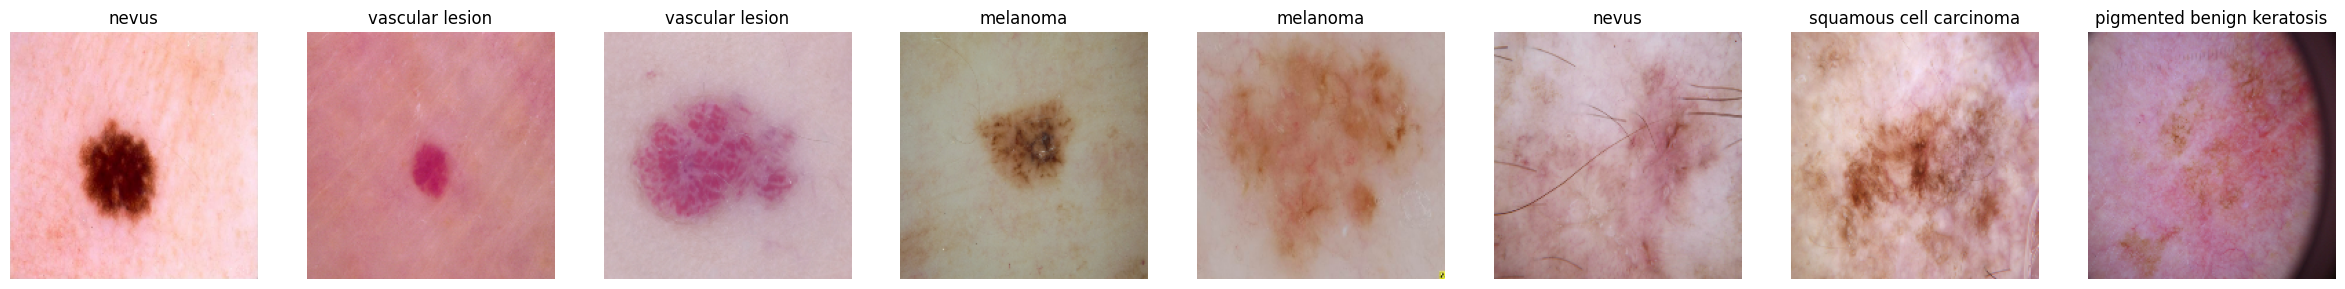

In [ ]:
plot_sample_images(image_list, labels_list, class_names,num_images=8)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
normalized_train_ds = normalized_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
normalized_val_ds = normalized_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 215168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      13,770,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,864,714 (52.89 MB)

 Trainable params: 13,864,714 (52.89 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  normalized_train_ds,
  validation_data=normalized_val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.7793 - loss: 0.5947 - val_accuracy: 0.4989 - val_loss: 2.1758
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8255 - loss: 0.4867 - val_accuracy: 0.4765 - val_loss: 2.2569
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8217 - loss: 0.5037 - val_accuracy: 0.5168 - val_loss: 2.1964
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8551 - loss: 0.4037 - val_accuracy: 0.4966 - val_loss: 2.6464
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8614 - loss: 0.4066 - val_accuracy: 0.5123 - val_loss: 2.9766
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8496 - loss: 0.4441 - val_accuracy: 0.5213 - val_loss: 2.5926
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8486 - loss: 0.4119 - val_accuracy: 0.4698 - val_loss: 2.4868
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8385 - loss: 0.4356 - val_accuracy: 0.5123 - v

### Visualizing training results

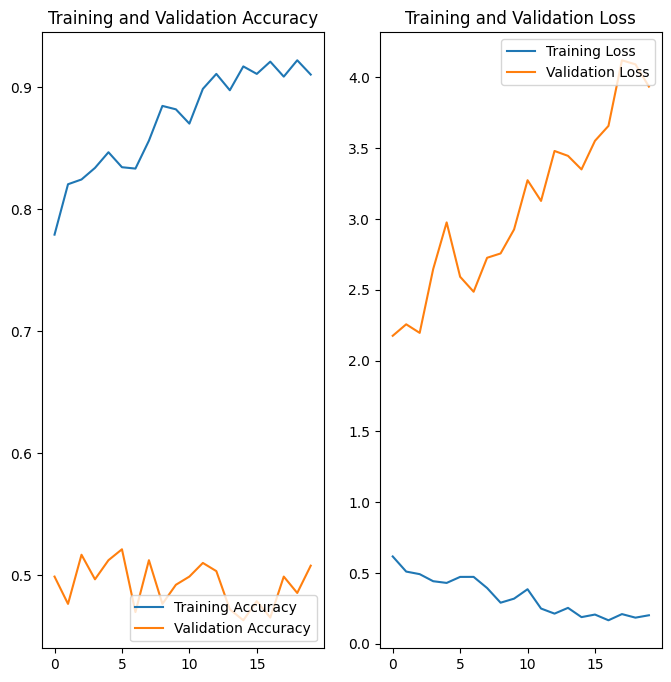

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [73]:
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomWidth, RandomHeight, RandomFlip
data_augmentation = tf.keras.Sequential([
    RandomRotation(0.2),
    RandomWidth(0.2),
    RandomHeight(0.2),
    RandomZoom(0.2),
    RandomFlip("horizontal"),
])


def augment_image(image, label):
    image = data_augmentation(image)
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0
    return image, label


train_data_augmented = normalized_train_ds.map(augment_image)
val_data_augmented = normalized_val_ds.map(augment_image)


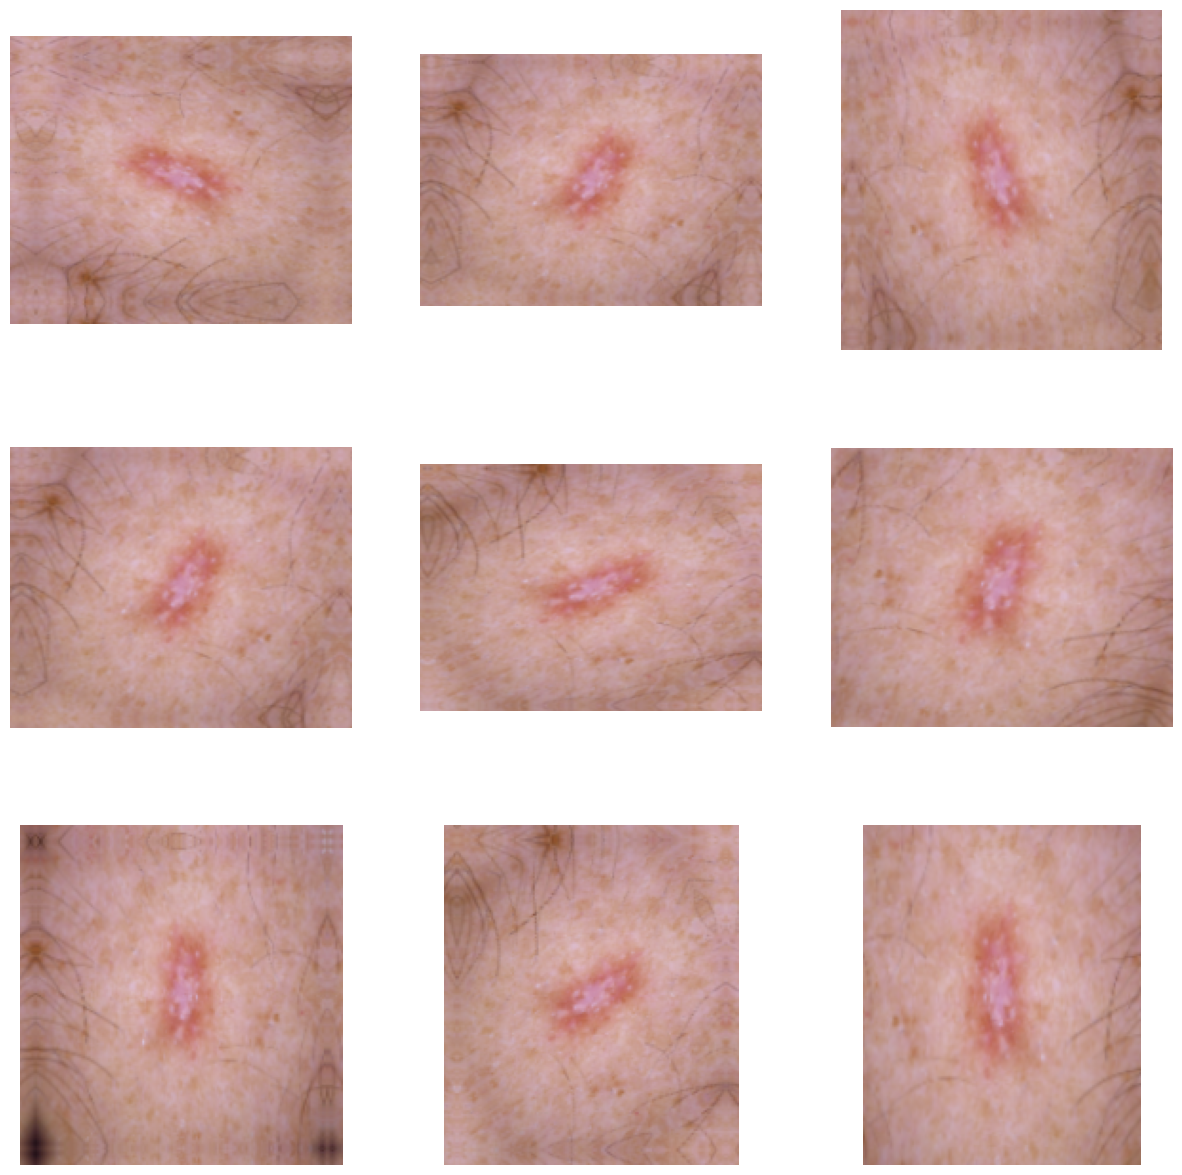

In [ ]:

sample_image, sample_label = next(iter(normalized_train_ds))
sample_image = sample_image[0]

sample_image = np.expand_dims(sample_image, axis=0)

plt.figure(figsize=(15, 15))

for i in range(9):
    augmented_image = data_augmentation(sample_image)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis('off')

plt.show()

### Todo:
### Create the model, compile and train the model


In [81]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(layers.Dropout(0.2))

model.add(Dense(10,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the model

In [82]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [83]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_data_augmented,
  validation_data=val_data_augmented,
  epochs=epochs
)

Epoch 1/20
  4/169 ━━━━━━━━━━━━━━━━━━━━ 7:51 3s/step - accuracy: 0.0807 - loss: 2.3014

KeyboardInterrupt: 

### Visualizing the results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

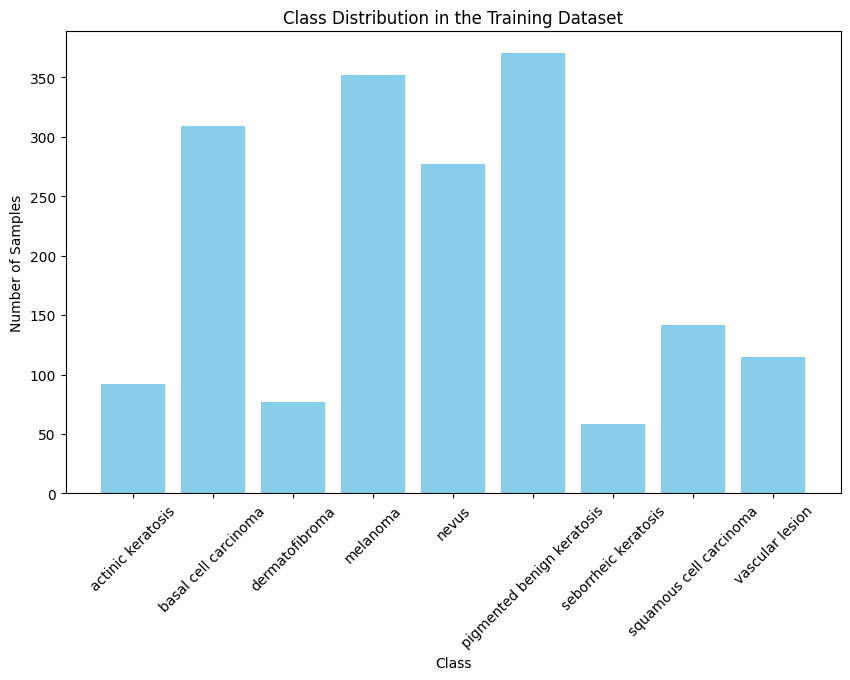

In [ ]:
## Your code goes here.
class_counts = [0] * len(class_names)


for images, labels in train_ds:
    for label in labels.numpy():
        class_counts[label] += 1

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.title('Class Distribution in the Training Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
import Augmentor
import glob
import os

for i in class_names:
    # Create the full path to the subdirectory for the current class
    source_dir = os.path.join(train_folder_path, i)

    # Check if the directory exists
    if os.path.exists(source_dir):
        p = Augmentor.Pipeline(source_directory=source_dir)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500)
    else:
        print(f"Warning: Directory not found: {source_dir}")


Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E06802CBB50>: 100%|██████████| 500/500 [00:31<00:00, 15.91 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E068032BE20>: 100%|██████████| 500/500 [00:24<00:00, 20.70 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E0688242560>: 100%|██████████| 500/500 [00:28<00:00, 17.61 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E06DB4C7C70>: 100%|██████████| 500/500 [01:55<00:00,  4.32 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E0680329D80>: 100%|██████████| 500/500 [01:44<00:00,  4.79 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E0688091150>: 100%|██████████| 500/500 [00:24<00:00, 20.14 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7E06801953C0>: 100%|██████████| 500/500 [00:50<00:00,  9.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E0680212EC0>: 100%|██████████| 500/500 [00:24<00:00, 20.00 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/dataSet/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E0688090100>: 100%|██████████| 500/500 [00:29<00:00, 16.82 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/dataSet/Train/melanoma/output/melanoma_original_ISIC_0000413.jpg_84660b0f-2e09-4d5f-894c-4579155a1b52.jpg',
 '/content/drive/MyDrive/dataSet/Train/melanoma/output/melanoma_original_ISIC_0010466.jpg_b27db4ab-5c39-4346-b6c2-672d4aeb502c.jpg',
 '/content/drive/MyDrive/dataSet/Train/melanoma/output/melanoma_original_ISIC_0010396.jpg_86f1e919-c8ca-41d6-94a9-bbb3fa4b1b71.jpg',
 '/content/drive/MyDrive/dataSet/Train/melanoma/output/melanoma_original_ISIC_0011178.jpg_c660dcd1-fa07-4525-ad5a-9f7bf8a83bab.jpg',
 '/content/drive/MyDrive/dataSet/Train/melanoma/output/melanoma_original_ISIC_0010393.jpg_8bc0ed9f-fd81-4b67-b1f0-8cc07531420b.jpg',
 '/content/drive/MyDrive/dataSet/Train/melanoma/output/melanoma_original_ISIC_0010145.jpg_cbbb8ff6-73d0-4e76-82c1-a825a59037ed.jpg',
 '/content/drive/MyDrive/dataSet/Train/melanoma/output/melanoma_original_ISIC_0009898.jpg_c9d81853-5bcd-4d7a-acfc-9ae85855c989.jpg',
 '/content/drive/MyDrive/dataSet/Train/melanoma/output/melanoma_origi

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
new_df['Label'].value_counts()

,count
Label,
melanoma,500
dermatofibroma,500
squamous cell carcinoma,500
pigmented benign keratosis,500
vascular lesion,500
nevus,500
basal cell carcinoma,500
actinic keratosis,500
seborrheic keratosis,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train= f'/content/drive/MyDrive/dataSet/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
normalized_train_aug_ds = train_ds.map(normalize_image)
normalized_val_aug_ds = val_ds.map(normalize_image)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(Flatten(input_shape=(5, 5, 128)))

model.add(Dense(64,activation='relu'))

model.add(layers.Dropout(0.2))

model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [62]:
epochs = 30

history =  model.fit(
  normalized_train_aug_ds,
  validation_data=normalized_val_aug_ds,
  epochs=epochs
)

Epoch 1/30


Exception ignored in: <function _xla_gc_callback at 0x7e06f3604dc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


169/169 ━━━━━━━━━━━━━━━━━━━━ 565s 3s/step - accuracy: 0.2199 - loss: 2.5534 - val_accuracy: 0.4209 - val_loss: 1.5488
Epoch 2/30


KeyboardInterrupt: 

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

